In [3]:
cd /root/freqtrade

/root/freqtrade


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta
import talib.abstract as ta
import pandas_ta as pta
from technical import qtpylib


In [5]:
df1 = pd.read_json('2022-10-05 07:48:23.436271.json')                      
df2 = pd.read_json('2022-10-05 10:33:39.353703.json')                      
df1['long_profit'] = (df1['profit_ratio'].multiply(100)).round(2)
df1['short_profit'] = (df2['profit_ratio'].multiply(100)).round(2)
# df = df1[df.long_profit.notna()]
# df[df.long_profit.notna()]
df = df1.copy()
# df = df[-10000:]
 
df.loc[(df.long_profit > 0) & (df.short_profit < 0), 'label'] = 'long'
df.loc[(df.long_profit < 0) & (df.short_profit > 0), 'label'] = 'short'
df.loc[(~df['label'].isin(['long', 'short'])) & (df.long_profit.notna()), 'label'] = 'hold'
""" prepare labels """
df.loc[(df['trade'] == 1)& (df['macd'] > df['macdsignal']), 'position'] = 'bottom' 
df.loc[(df['trade'] == 1)& (df['macd'] < df['macdsignal']), 'position'] = 'top'
df.loc[(df['trade'] == 1)& (df['macd'] > df['macdsignal']), 'position'] = 'long' 
df.loc[(df['trade'] == 1)& (df['macd'] < df['macdsignal']), 'position'] = 'short'

In [14]:
df['rsi'] = ta.RSI(df)
df['adx'] = ta.ADX(df)
df['volume_pct'] = df['volume'].pct_change()
df['close_pct'] = df['close'].pct_change()

features_kmeans_dict_20bar = {'adx':[], 'rsi':[], 'close':[]}
features_kmeans_dict_10bar = {'adx':[], 'rsi':[]}
features_kmeans_dict_3bar = {'close':[]}
features_kmeans_dict_1bar = {'volume_pct':[], 'close_pct':[]}

features_kemeans_dict = {'bar_20':features_kmeans_dict_20bar, 'bar_10':features_kmeans_dict_10bar, 'bar_3':features_kmeans_dict_3bar}

for i in features_kmeans_dict_20bar:
    for j in range(20,0,-1):
        features_kmeans_dict_20bar[i].append(f'{i}_-{j}')
        df[f'{i}_-{j}'] = df[f'{i}'].shift(j)
for i in features_kmeans_dict_10bar:
    for j in range(10,0,-1):
        features_kmeans_dict_10bar[i].append(f'{i}_-{j}')
        df[f'{i}_-{j}'] = df[f'{i}'].shift(j)
for i in features_kmeans_dict_3bar:
    for j in range(3,0,-1):
        features_kmeans_dict_3bar[i].append(f'{i}_-{j}')
        df[f'{i}_-{j}'] = df[f'{i}'].shift(j)
for i in features_kmeans_dict_1bar:
    for j in range(1,0,-1):
        features_kmeans_dict_1bar[i].append(f'{i}_-{j}')
        df[f'{i}_-{j}'] = df[f'{i}'].shift(j)

    

/tmp/ipykernel_9666/1373476590.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans.replace(np.inf, 0, inplace=True)
/tmp/ipykernel_9666/1373476590.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans[f'{k_name}_label'] = kmeans.labels_


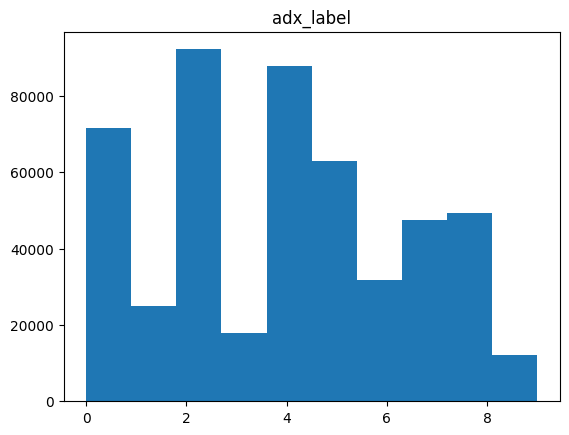

/tmp/ipykernel_9666/1373476590.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans[f'{k_name}_label'] = kmeans.labels_


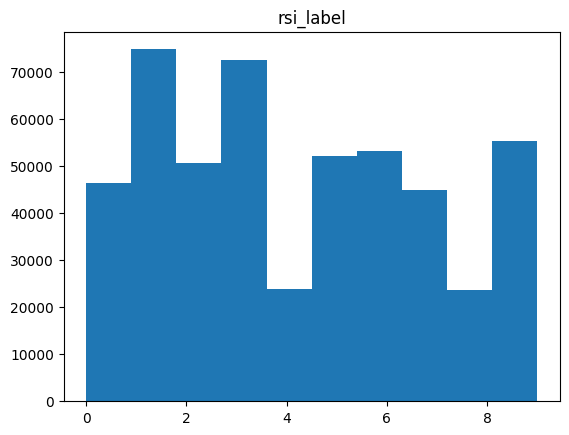

/tmp/ipykernel_9666/1373476590.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans[f'{k_name}_label'] = kmeans.labels_


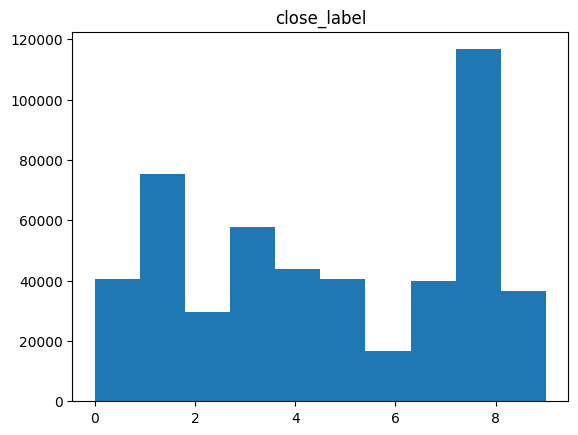

/tmp/ipykernel_9666/1373476590.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans[f'{k_name}_label'] = kmeans.labels_


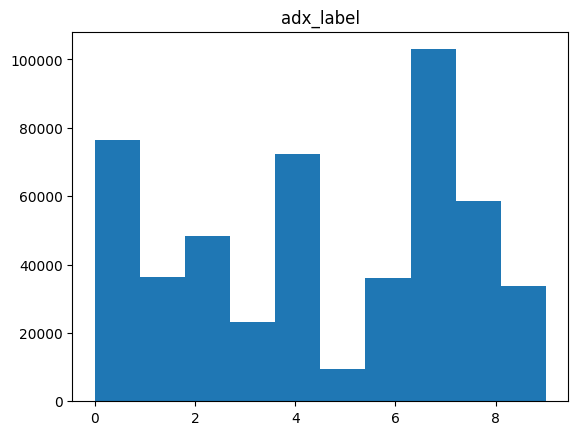

/tmp/ipykernel_9666/1373476590.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans[f'{k_name}_label'] = kmeans.labels_


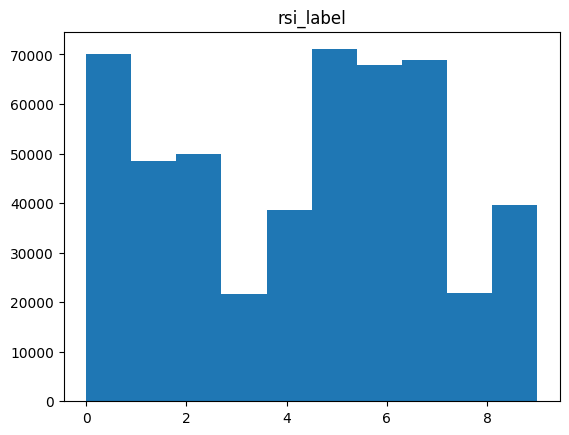

/tmp/ipykernel_9666/1373476590.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans[f'{k_name}_label'] = kmeans.labels_


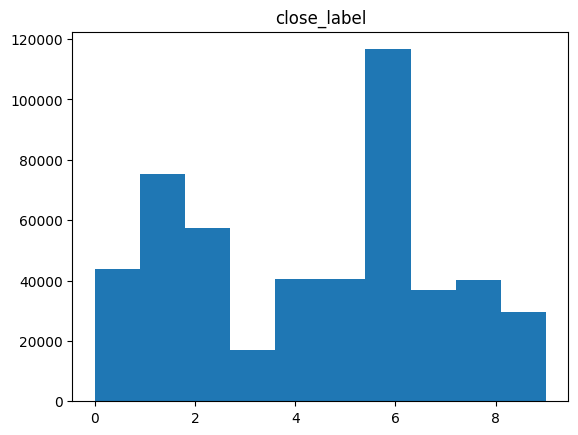

In [15]:
from sklearn.cluster import KMeans
import random
k_means_label = []
df_kmeans = df.dropna()
df_kmeans.reset_index(drop=True, inplace=True)
df_kmeans.replace(np.inf, 0, inplace=True)
for i,j in features_kemeans_dict.items():
    for k,v in j.items():
        k_name = f'{i}_{k}'
        k_clusters = 10
        kmeans = KMeans(n_clusters=k_clusters, random_state=42)
        y_pred = kmeans.fit_predict(df_kmeans[v])
        # kmeans.labels_
        # kmeans.cluster_centers_.shape
        df_kmeans[f'{k_name}_label'] = kmeans.labels_
        k_means_label.append(f'{k_name}_label')
        plt.hist(kmeans.labels_, bins=10)
        plt.title(f'{k}_label')
        plt.show()

In [19]:
stats = df_kmeans[k_means_label]
stats.duplicated()

484155

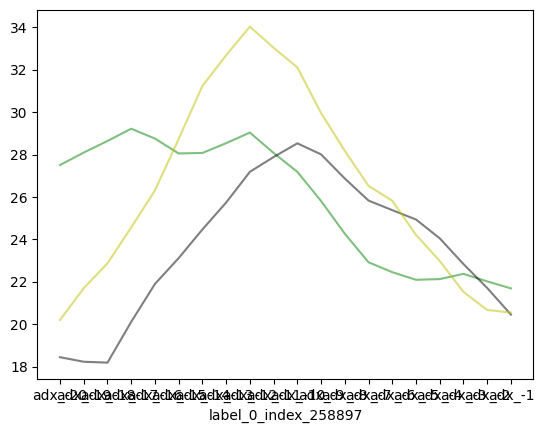

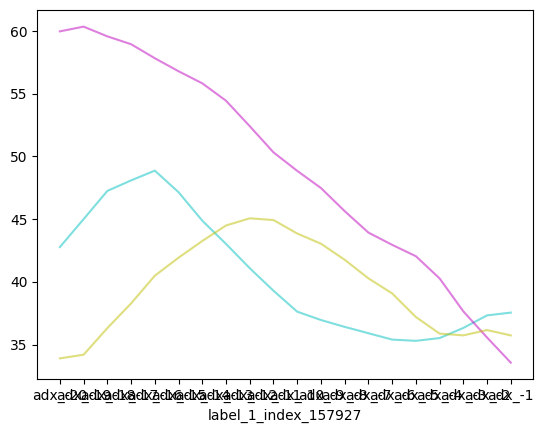

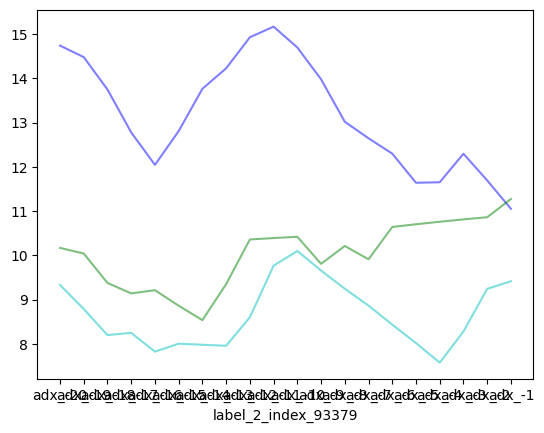

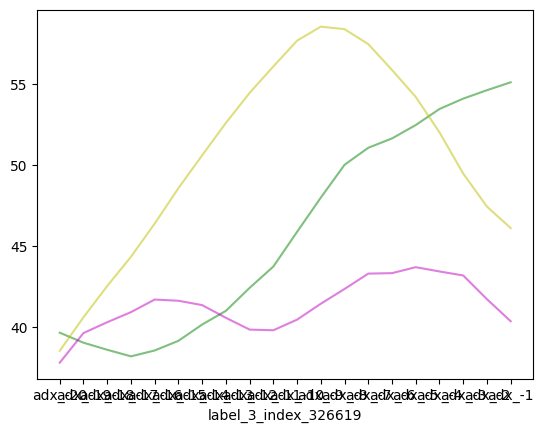

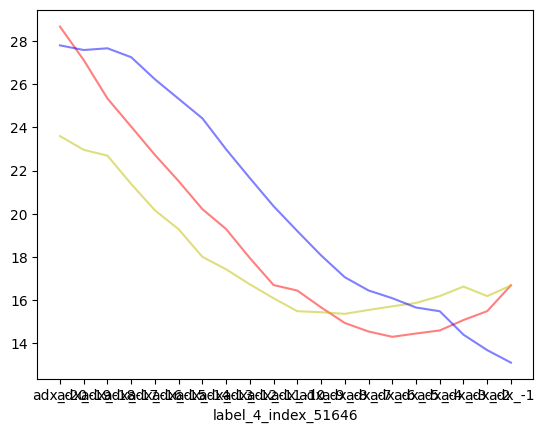

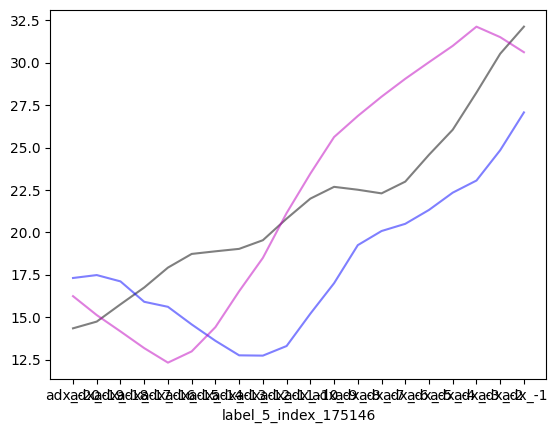

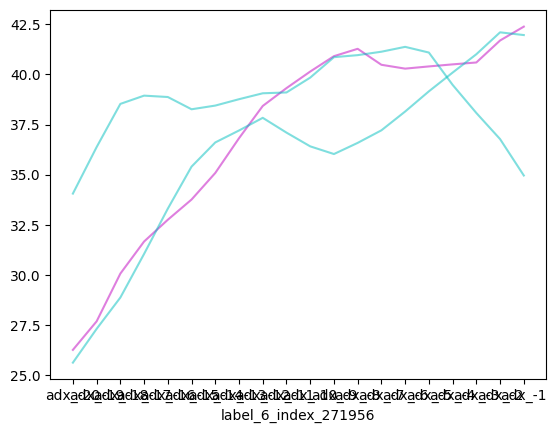

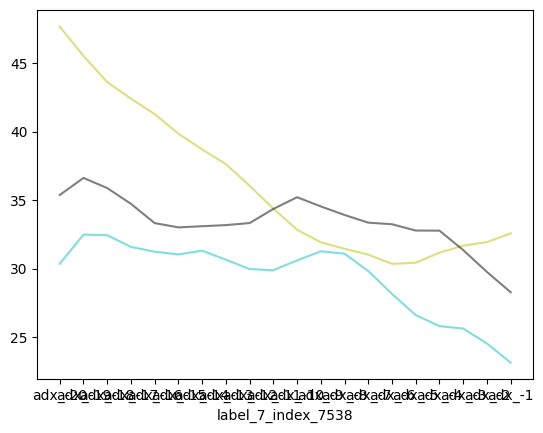

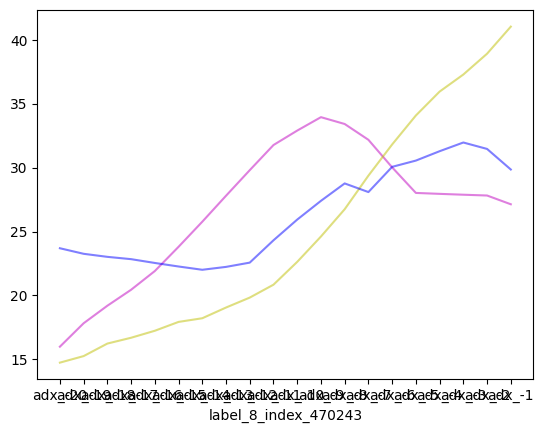

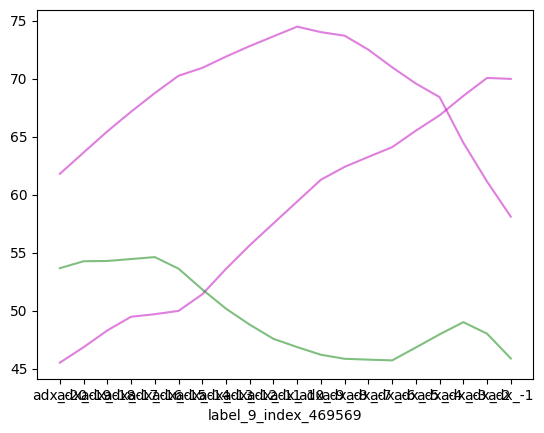

IndexError: Cannot choose from an empty sequence

In [31]:
for times in range(0,20):
    for i in range(3):
            color = "bgrcmyk"
            
            # index_ = random.choice(df_kmeans[df_kmeans['bar_20_adx_label']==times].index)
            index_ = random.choice(df_kmeans[df_kmeans['bar_20_adx_label']==times].index)
            plt.xlabel(f'label_{times}_index_{index_}')
        #     plt.title = f'label_{times}_index_{index_}'
            # x = df_kmeans.loc[index_,bar_3_ohlcv].columns
            # y =  df_kmeans.loc[index_,bar_3_ohlcv].values.reshape(3,1)
            # plt.plot(x,y, color='blue', alpha=0.5, linewidth=1, linestyle='dashed', marker='o', markersize=4)
            plt.plot(df_kmeans.loc[index_,features_kmeans_dict_20bar['adx']], color=random.choice(color), alpha=0.5)

            
    plt.show()        

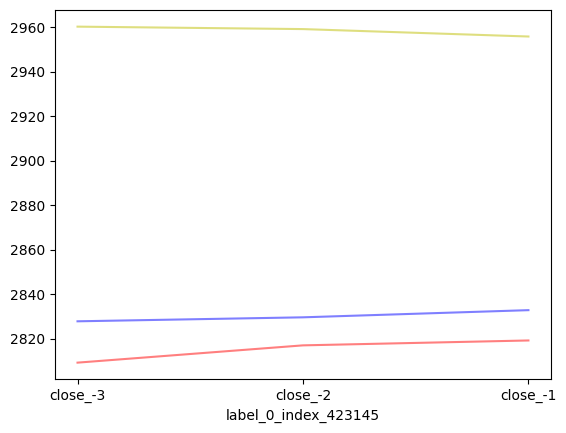

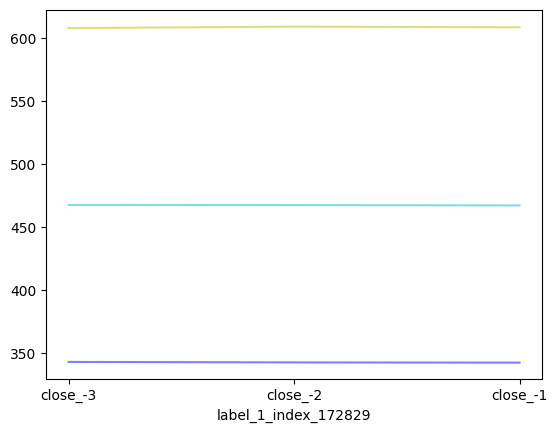

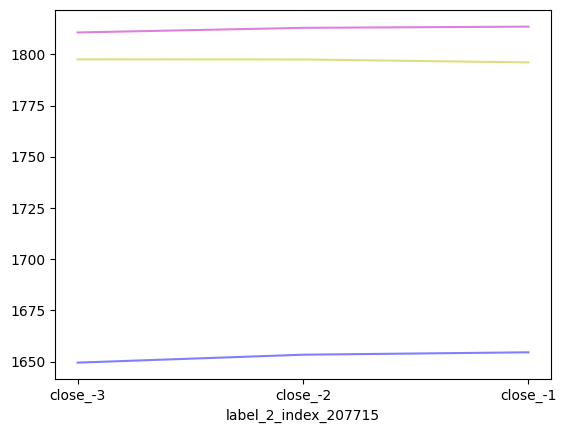

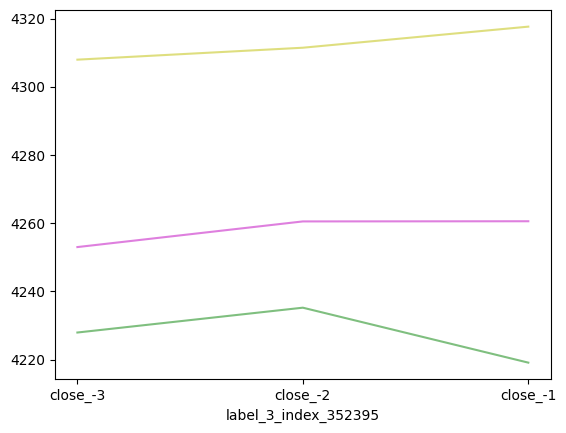

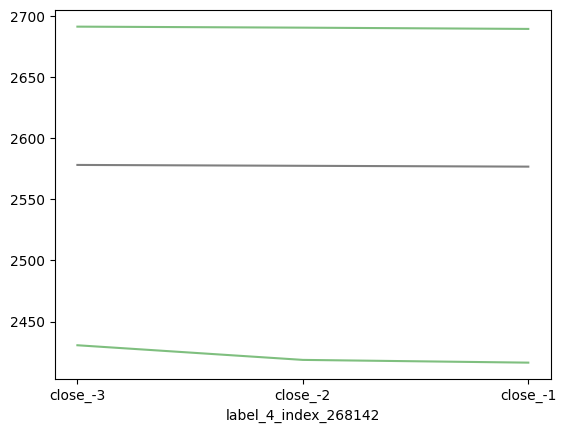

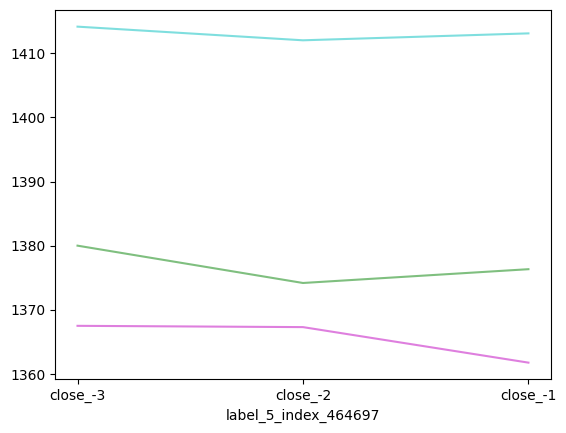

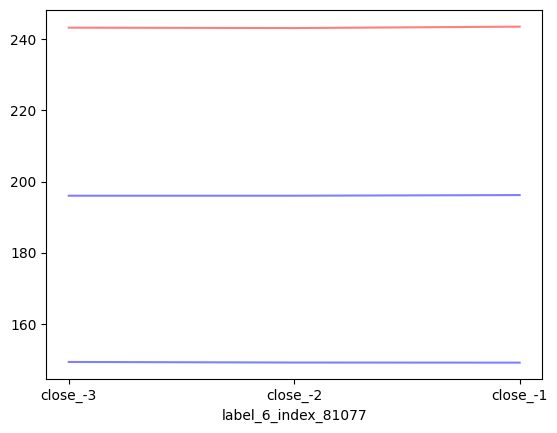

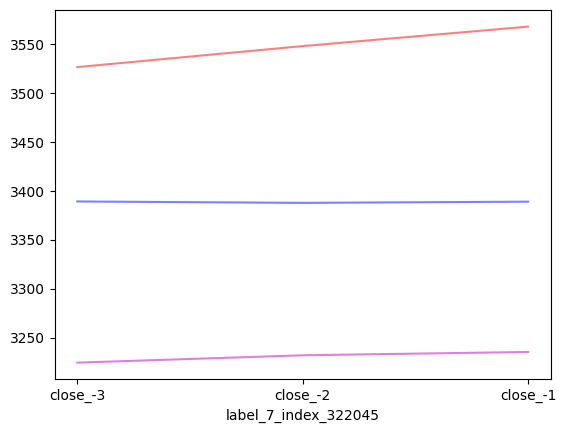

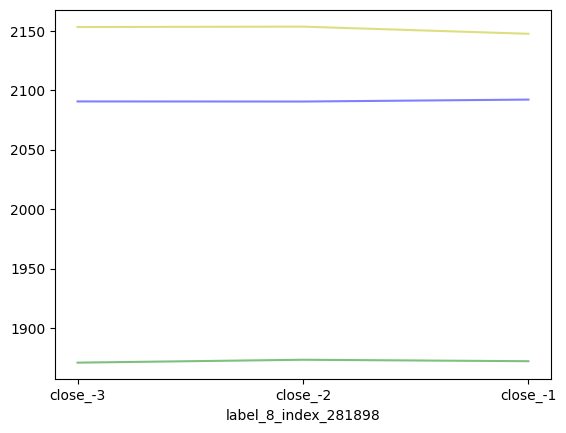

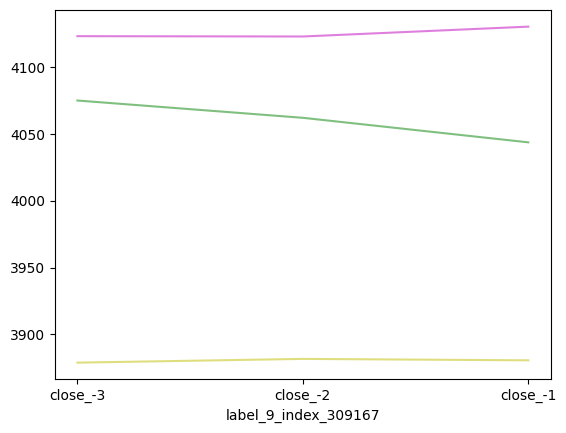

IndexError: Cannot choose from an empty sequence

In [32]:
""" OHLCV """
for times in range(0,20):
    for i in range(3):
            color = "bgrcmyk"
            index_ = random.choice(df_kmeans[df_kmeans['bar_3_close_label']==times].index)
            plt.xlabel(f'label_{times}_index_{index_}')
            plt.plot(df_kmeans.loc[index_,features_kmeans_dict_3bar['close']], color=random.choice(color), alpha=0.5)
    plt.show()        

In [ ]:
features = list(df_kmeans.columns[-5:])
features.append('position')
features.extend(bar_1_volome_pct)

In [ ]:
df_kmeans[features].shape
df_kmeans[[i for i in features]+['label']].tail(30)


,bar_20_rsi_label,bar_10_adx_label,bar_3_ohlcv_label,bar_1_volome_pct_label,bar_10_rsi_label,position,volume_pct_-1,close_pct_-1,label
497777,6,7,5,0,5,long,0.165006,-0.000843,short
497778,6,7,5,0,5,short,0.097014,-0.000070,short
497779,6,0,5,0,5,short,0.061282,-0.001463,short
497780,6,0,5,0,0,short,0.206680,0.000364,short
497781,3,0,5,5,0,short,-0.562054,0.000085,short
497782,1,0,5,9,0,short,0.680871,0.001000,short
497783,1,0,5,5,0,short,-0.161763,0.000163,short
497784,1,0,5,0,0,short,0.120138,-0.001563,short
497785,1,0,5,5,0,short,-0.142518,0.000946,short
497786,1,0,5,5,0,short,-0.405255,0.000116,short


In [ ]:
df_kmeans[[i for i in features]+['label']].tail(30)

,bar_20_rsi_label,bar_10_adx_label,bar_3_ohlcv_label,bar_1_volome_pct_label,bar_10_rsi_label,position,volume_pct_-1,close_pct_-1,label
497777,6,7,5,0,5,long,0.165006,-0.000843,short
497778,6,7,5,0,5,short,0.097014,-0.000070,short
497779,6,0,5,0,5,short,0.061282,-0.001463,short
497780,6,0,5,0,0,short,0.206680,0.000364,short
497781,3,0,5,5,0,short,-0.562054,0.000085,short
497782,1,0,5,9,0,short,0.680871,0.001000,short
497783,1,0,5,5,0,short,-0.161763,0.000163,short
497784,1,0,5,0,0,short,0.120138,-0.001563,short
497785,1,0,5,5,0,short,-0.142518,0.000946,short
497786,1,0,5,5,0,short,-0.405255,0.000116,short


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.impute import SimpleImputer


In [ ]:
""" process data """
X = df_kmeans[features]
y = df_kmeans['label']
# X_pipeline = make_pipeline(StandardScaler())
# y_pipeline = make_pipeline(StandardScaler())
# X = X_pipeline.fit_transform(X)
# y = y_pipeline.fit_transform(y.values.reshape(-1, 1))
X.replace(np.inf, 0, inplace=True)
num_attribs = list(X.columns)[6:]
cat_attribs = list(X.columns)[:6]
num_pipeline = make_pipeline(
    StandardScaler())
cat_pipeline = make_pipeline(
    OneHotEncoder())
# X_t = cat_pipeline.fit_transform(X[cat_attribs])
preprocessing = ColumnTransformer([
    ('num', num_pipeline ,num_attribs),
    # ('cat', cat_pipeline,make_column_selector(dtype_include=object))
    ('cat2', cat_pipeline,cat_attribs)])
y_pipiline = make_pipeline(OneHotEncoder())
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.9, random_state=42,shuffle=False)


/tmp/ipykernel_1867/1155581089.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(np.inf, 0, inplace=True)


In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, LSTM, Bidirectional, GRU, BatchNormalization
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import optimizers

In [ ]:
X_t = preprocessing.fit_transform(X_train).toarray()
y_t = y_pipiline.fit_transform(y_train.values.reshape(-1, 1)).toarray()



In [ ]:
model =  Sequential(
    [
# Flatten(input_shape=(X_t.shape[1],)),
Dense(320, activation='relu'),
Dense(160, activation='relu'),
Dense(64, activation='relu'),
Dense(32, activation='relu'),
Dense(3,activation='softmax')
    ]
)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
ES = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model.fit(X_t, y_t, epochs=500, batch_size=32, validation_split=0.2, verbose=1, shuffle=False, callbacks=[ES], use_multiprocessing=True, workers=4)

Epoch 1/500
1245/1245 [==============================] - 5s 3ms/step - loss: 1.0558 - accuracy: 0.4392 - val_loss: 0.9630 - val_accuracy: 0.5611
Epoch 2/500
1245/1245 [==============================] - 4s 3ms/step - loss: 1.0500 - accuracy: 0.4444 - val_loss: 0.9651 - val_accuracy: 0.5611
Epoch 3/500
1245/1245 [==============================] - 4s 3ms/step - loss: 1.0488 - accuracy: 0.4441 - val_loss: 0.9641 - val_accuracy: 0.5611
Epoch 4/500
1245/1245 [==============================] - 4s 3ms/step - loss: 1.0474 - accuracy: 0.4451 - val_loss: 0.9639 - val_accuracy: 0.5611
Epoch 5/500
1245/1245 [==============================] - 4s 3ms/step - loss: 1.0456 - accuracy: 0.4447 - val_loss: 0.9641 - val_accuracy: 0.5611
Epoch 6/500
1245/1245 [==============================] - 4s 3ms/step - loss: 1.0437 - accuracy: 0.4455 - val_loss: 0.9648 - val_accuracy: 0.5611
Epoch 7/500
1245/1245 [==============================] - 4s 3ms/step - loss: 1.0411 - accuracy: 0.4481 - val_loss: 0.9656 - val_ac

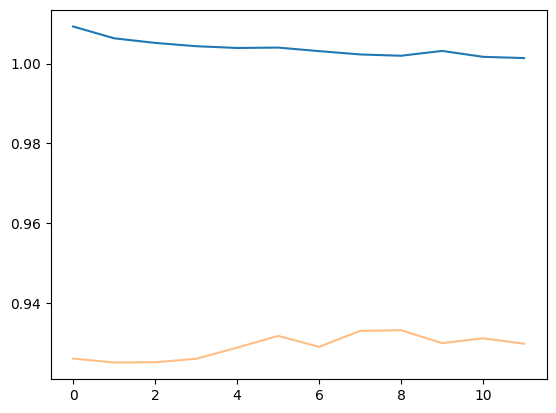

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'], alpha=0.5)
plt.show()